<a href="https://colab.research.google.com/github/gani88/ML-DataScience/blob/main/Dicoding_ML_StudyCase_Overfitting%26Underfitting_2_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Underfitting Case

## Import, Load, and Split

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt


# Load Dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# X.head()
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
y

,0
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [ ]:
X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
149,13.740,17.91,88.12,585.0,0.07944,0.06376,0.02881,0.01329,0.1473,0.05580,...,15.340,22.46,97.19,725.9,0.09711,0.18240,0.15640,0.06019,0.2350,0.07014
124,13.370,16.39,86.10,553.5,0.07115,0.07325,0.08092,0.02800,0.1422,0.05823,...,14.260,22.75,91.99,632.1,0.10250,0.25310,0.33080,0.08978,0.2048,0.07628
421,14.690,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,...,16.460,18.34,114.10,809.2,0.13120,0.36350,0.32190,0.11080,0.2827,0.09208
195,12.910,16.33,82.53,516.4,0.07941,0.05366,0.03873,0.02377,0.1829,0.05667,...,13.880,22.00,90.81,600.6,0.10970,0.15060,0.17640,0.08235,0.3024,0.06949
545,13.620,23.23,87.19,573.2,0.09246,0.06747,0.02974,0.02443,0.1664,0.05801,...,15.350,29.09,97.58,729.8,0.12160,0.15170,0.10490,0.07174,0.2642,0.06953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,0.08980,...,9.733,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840
106,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520,...,13.140,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097
270,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,...,14.910,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120
435,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,0.06544,...,17.040,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550


## Modelling

In [ ]:
# Case underfitting model (Decision Tree w/ low max depth)
model_underfit = DecisionTreeClassifier(max_depth=1, random_state=42)
model_underfit.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

In [ ]:
# Predict
y_train_pred_underfit = model_underfit.predict(X_train)
y_test_pred_underfit = model_underfit.predict(X_test)

## Detecting Underfitting

### 1. Evaluate Performance on Training Data and Testing Data

We use accuracy as a metric to evaluate how well the model classifies data. Accuracy is calculated for both the training and testing datasets to measure the model's performance.

In [ ]:
# Evaluate performance on trainin and testing data
train_acc_underfit = accuracy_score(y_train, y_train_pred_underfit)
test_acc_underfit = accuracy_score(y_test, y_test_pred_underfit)

print(f'Underfit Model Training Accuracy: {train_acc_underfit}')
print(f'Underfit Model Testing Accuracy: {test_acc_underfit}')


Underfit Model Training Accuracy: 0.9246231155778895
Underfit Model Testing Accuracy: 0.8947368421052632


### 2. Learning Curve

Next, we can use a **learning curve** to analyze how the model performs with different sizes of training data. This helps us evaluate whether the model is learning effectively and identify any potential issues, such as underfitting or overfitting.

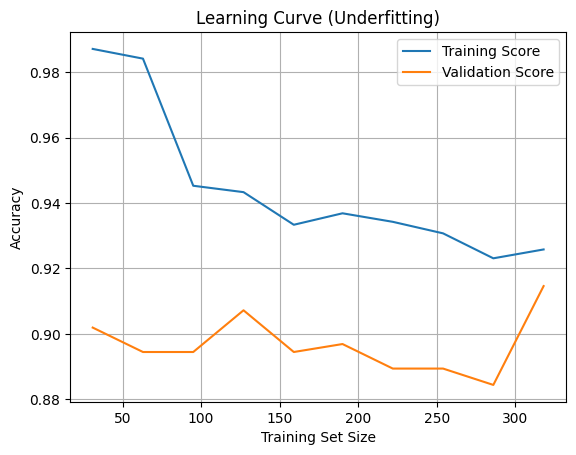

In [ ]:
# Learning curve to check model in any size of training data
train_sizes, train_scores, test_scores = learning_curve(model_underfit, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot learning curve
plt.figure()
plt.plot(train_sizes, train_scores_mean, label='Training Score')
plt.plot(train_sizes, test_scores_mean, label='Validation Score')
plt.ylabel('Accuracy')
plt.xlabel('Training Set Size')
plt.title('Learning Curve (Underfitting)')
plt.legend()
plt.grid(True)
plt.show()

As we can see from the graph, if the training score and validation score do not improve significantly as the training size increases, this indicates that the model might not be complex enough to capture the patterns in the data. This is a sign of **underfitting**. The graph helps us understand that the model is too simple and may need to be made more complex to improve its performance.

## Handling Underfitting

The purpose of this is to refine the model so it can effectively capture existing patterns in the data. Here are some of the methods used to achieve this.

### Using More Complex Model

In [ ]:
X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
149,13.740,17.91,88.12,585.0,0.07944,0.06376,0.02881,0.01329,0.1473,0.05580,...,15.340,22.46,97.19,725.9,0.09711,0.18240,0.15640,0.06019,0.2350,0.07014
124,13.370,16.39,86.10,553.5,0.07115,0.07325,0.08092,0.02800,0.1422,0.05823,...,14.260,22.75,91.99,632.1,0.10250,0.25310,0.33080,0.08978,0.2048,0.07628
421,14.690,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,...,16.460,18.34,114.10,809.2,0.13120,0.36350,0.32190,0.11080,0.2827,0.09208
195,12.910,16.33,82.53,516.4,0.07941,0.05366,0.03873,0.02377,0.1829,0.05667,...,13.880,22.00,90.81,600.6,0.10970,0.15060,0.17640,0.08235,0.3024,0.06949
545,13.620,23.23,87.19,573.2,0.09246,0.06747,0.02974,0.02443,0.1664,0.05801,...,15.350,29.09,97.58,729.8,0.12160,0.15170,0.10490,0.07174,0.2642,0.06953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,0.08980,...,9.733,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840
106,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520,...,13.140,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097
270,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,...,14.910,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120
435,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,0.06544,...,17.040,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550


In [ ]:
y_train

,0
149,1
124,1
421,1
195,1
545,1
...,...
71,1
106,1
270,1
435,0


In [ ]:
# Using more complex model
complex_model = DecisionTreeClassifier(max_depth=10, random_state=42)
complex_model.fit(X_train, y_train)

# Prediction for training and testing data
y_train_pred_complex = complex_model.predict(X_train)
y_test_pred_complex = complex_model.predict(X_test)

# Evaluate performance
train_acc_complex = accuracy_score(y_train, y_train_pred_complex)
test_acc_complex = accuracy_score(y_test, y_test_pred_complex)

print(f'Training Accuracy (Complex Model) : {train_acc_complex}')
print(f'Testing Accuracy (Complex Model) : {test_acc_complex}')

Training Accuracy (Complex Model) : 1.0
Testing Accuracy (Complex Model) : 0.9415204678362573


### Add more features (Feature Engineering with PCA)

We introduce additional features using PCA (Principal Component Analysis), a technique used to reduce the dimensionality of data while retaining its most important information. By generating new features from the original data, PCA helps the model better understand and capture more complex patterns.

In [ ]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
y.head()

,0
0,0
1,0
2,0
3,0
4,0


In [ ]:
# Data Normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA to reduce dimension / produce new feature
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

# Split data
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Modelling with PCA feature
complex_model_pca = DecisionTreeClassifier(max_depth=10, random_state=42)
complex_model_pca.fit(X_train_pca, y_train_pca)

# Prediction on Training and Testing data
y_train_pred_pca = complex_model_pca.predict(X_train_pca)
y_test_pred_pca = complex_model_pca.predict(X_test_pca)

train_acc_pca = accuracy_score(y_train_pca, y_train_pred_pca)
test_acc_pca = accuracy_score(y_test_pca, y_test_pred_pca)

print(f"Training Accuracy (PCA): {train_acc_pca}")
print(f"Test Accuracy (PCA): {test_acc_pca}")

Training Accuracy (PCA): 1.0
Test Accuracy (PCA): 0.9415204678362573


### Tuning Hyperparameter using GridSearchCV

Essentially, this process involves finding the best combination of model parameters to improve its performance, often using GridSearchCV. This technique systematically searches through a predefined set of hyperparameters to identify the optimal configuration for the model.

In [ ]:
# Grid Search for Hyperparameter Tuning
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='accuracy')

# Searching best hyperparameter
grid_search.fit(X_train, y_train)

# Best Hyperparameter
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict with best model
y_train_pred_best = best_model.predict(X_train)
y_test_pred_best = best_model.predict(X_test)

# Performance evaluation
train_acc_best = accuracy_score(y_train, y_train_pred_best)
test_acc_best = accuracy_score(y_test, y_test_pred_best)

print(f"Training Accuracy (Best Model): {train_acc_best}")
print(f"Testing Accuracy (Best Model): {test_acc_best}")
print(f"Best Params: {best_params}")

Training Accuracy (Best Model): 0.9949748743718593
Testing Accuracy (Best Model): 0.9532163742690059
Best Params: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
